In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import itertools
%matplotlib inline

In [2]:
df = pd.read_excel('datos-moneda.xlsx')
df.head()

,Grupo,y,x1,x2
0,astronautas,143.5,20.0,6.0
1,astronautas,66.0,20.0,4.0
2,astronautas,14.3,20.0,2.0
3,astronautas,128.0,20.0,8.0
4,astronautas,133.5,20.0,6.0


In [3]:
modelo = smf.ols('y ~ x1 + x2 + C(Grupo)', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     6.321
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           3.61e-07
Time:                        10:26:59   Log-Likelihood:                -434.60
No. Observations:                  83   AIC:                             893.2
Df Residuals:                      71   BIC:                             922.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -19.5255     33.168     -0.589      0.558     -85.661      46.610
C(Grupo)[T.Los podridos]                    5.6532     28.929      0.195      0.846     -52.030      63.337
C(Grupo)[T.Redline]                       -65.1590     26.910     -2.421      0.018    -118.816     -11.502
C(Grupo)[T.astronautas]                    -5.5133     27.275     -0.202      0.840     -59.899      48.872
C(Grupo)[T.el duo]                          3.3463     24.819      0.135      0.893     -46.142      52.835
C(Grupo)[T.el duo dinamico]               -92.4100     53.562     -1.725      0.089    -199.209      14.389
C(Grupo)[T.los calzoncillos galacticos]    17.1445     27.722      0.618      0.538     -38.131      72.420
C(Grupo)[T.los liroy]                      33.6840     25.726      1.309      0.195     -17.613      84.981
C(Grupo)[T.pitbull crew]                  -42.2132     24.300     -1.737      0.087     -90.666       6.240
C(Grupo)[T.zelda]                         -25.7128     25.740     -0.999      0.321     -77.036      25.611
x1                                          3.2508      1.469      2.213      0.030       0.321       6.180
x2                                         10.8202      2.705      4.001      0.000       5.427      16.213
==============================================================================
Omnibus:                       10.943   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.381
Skew:                           0.681   Prob(JB):                      0.00205
Kurtosis:                       4.313   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

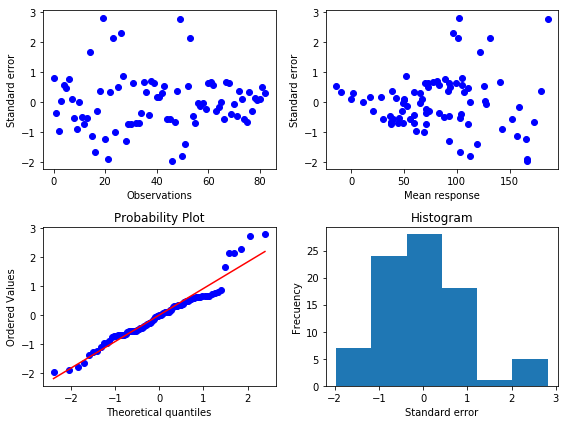

In [4]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df.index, resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

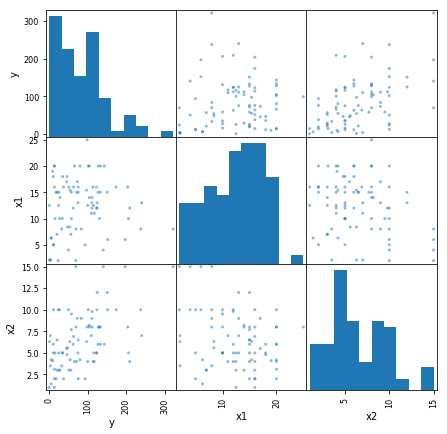

In [5]:
pd.plotting.scatter_matrix(df, figsize=(7, 7));